<center><div style="font-size : 20px; font-weight : bold; color : darkbue;">PENGANTAR DATA SCIENCE</div>
<div>Eksplorasi Dataset Banking</div>
<hr>
<div>6182001004 | William Surya W - 6182001005 | Kae Zarren L H - 6182001042 | Ester Oka N</div>

In [62]:
#import library
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt

from sklearn.feature_selection import *;

import seaborn as sns

In [63]:
#load dataset
url = ['https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/bike-dt/day.csv'
        ,'https://raw.githubusercontent.com/shrk-sh-ioai/pds-banking-dt/main/bike-dt/hour.csv'];

day = pd.read_csv(url[0], sep=",", encoding='cp1252');
hour = pd.read_csv(url[1], sep=",", encoding='cp1252');

In [64]:
#data preparation
day_features = day[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered']];

day_features_np = np.array(day_features.values);

day_labels = day[['cnt']];

day_labels_np = np.array(day_labels.values);
day_labels_np = day_labels_np.ravel();

In [65]:
#metode selection (1) : chi-square
k = 4;
selector = SelectKBest(score_func = chi2, k=k);
selector.fit(day_features_np, day_labels_np);

cols = selector.get_support(indices=True);
day_features = day_features.iloc[:,cols];

day_features_np = np.array(day_features.values);

print (str(k)+" Kolom dengan nilai Chi Square terbaik adalah ")
print(day_features.columns);

4 Kolom dengan nilai Chi Square terbaik adalah 
Index(['mnth', 'weekday', 'casual', 'registered'], dtype='object')


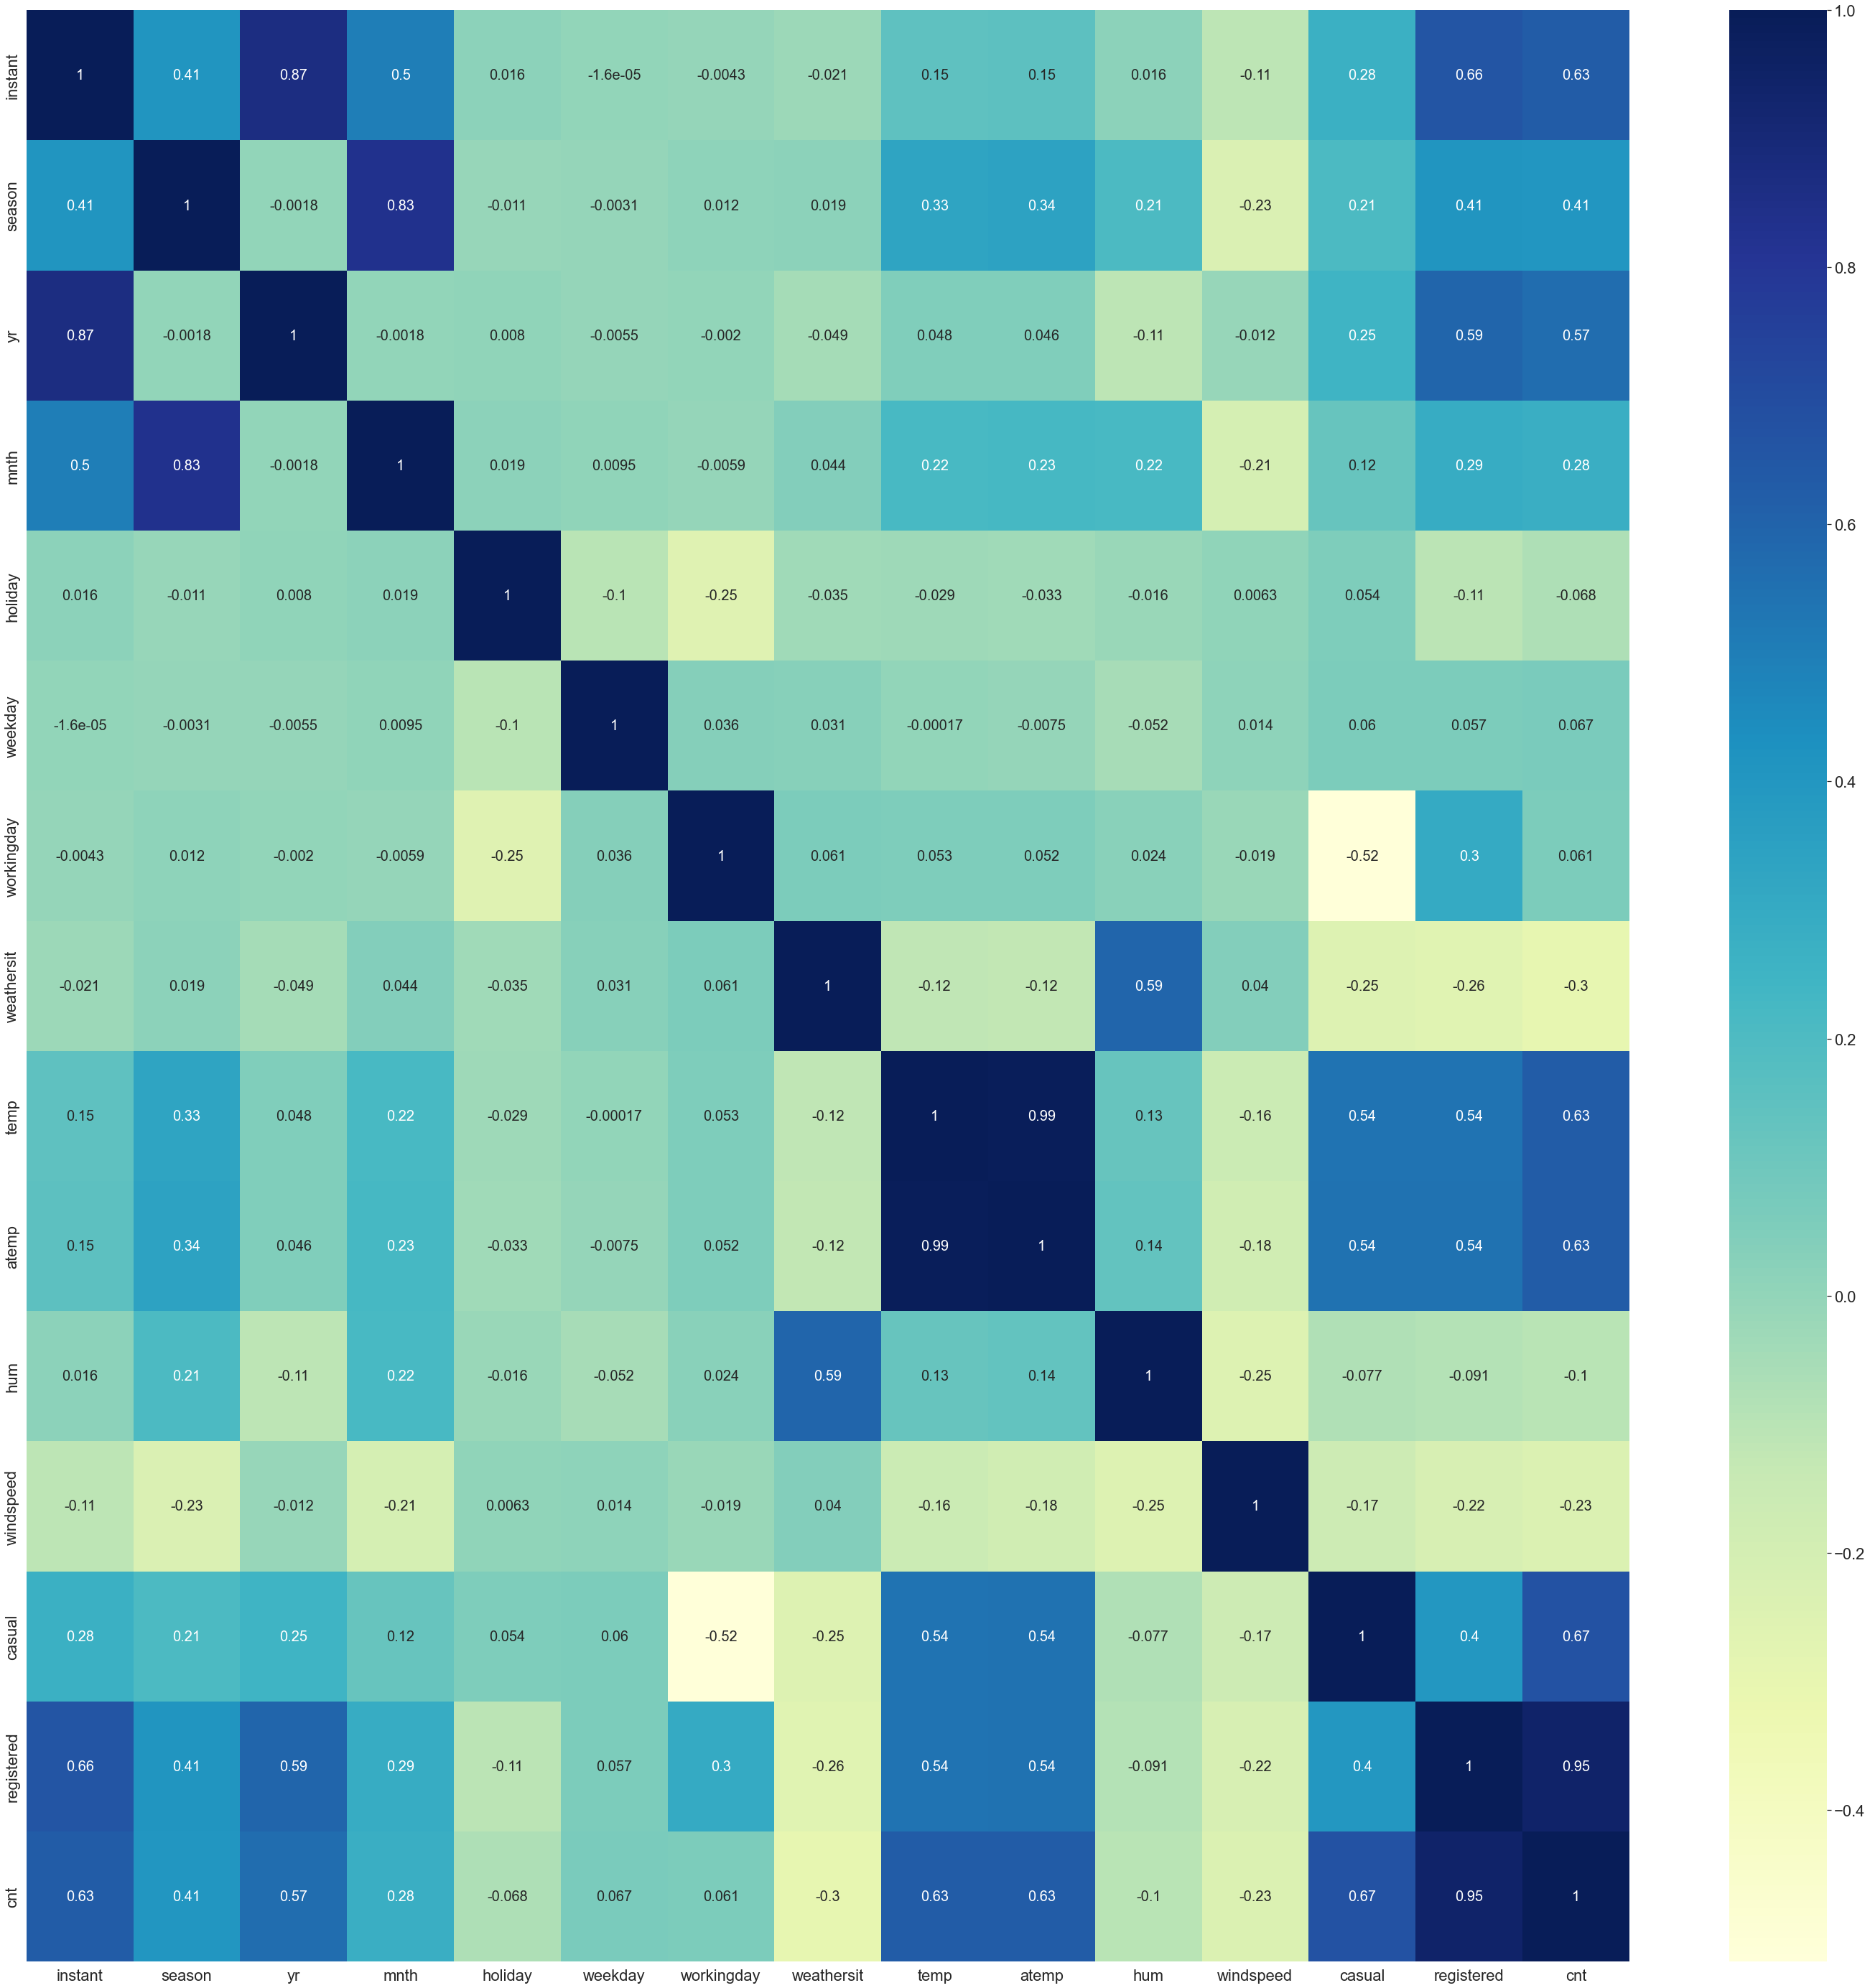

In [66]:
#metode selection (2) : heat-map
corr = day.corr()

sns.set(rc = {'figure.figsize':(50,50)}, font_scale=2);
sns.heatmap(corr, cmap="YlGnBu", annot = True, linewidths=0, annot_kws={"size": 20});
plt.show()